<a href="https://colab.research.google.com/github/supriya-mule-1544/supriya_project_creditcard_risk_analysis/blob/main/supriya_projec_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

**Project Title:** Advancing Data Security in Global Banking: Innovative Big Data Management Techniques  

This section performs exploratory data analysis on the *Default of Credit Card Clients* dataset.  
The purpose of this analysis is to understand the dataset structure, assess data quality, identify patterns in financial behaviour, and examine relationships between customer characteristics and default risk.






In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Dataset Loading

The dataset is loaded from the provided Excel file.  
The first few rows are displayed to confirm successful loading and to preview the structure of the data.

This dataset contains customer demographic information, financial variables, repayment behaviour, and a target variable indicating whether the customer defaulted in the following month.



In [4]:
# Load dataset directly from uploaded file

file_path = "/content/drive/MyDrive/default of credit card clients.xls"

df = pd.read_excel(file_path)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)

df.head()


Dataset Loaded Successfully
Shape: (30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## 2. Column Name Standardisation

Column names are cleaned by removing extra spaces and replacing spaces with underscores.  
This ensures consistent naming conventions and prevents errors during analysis and modelling.


In [5]:
# Clean column names (replace spaces with underscore)

df.columns = [col.strip().replace(" ", "_") for col in df.columns]

df.columns


Index(['Unnamed:_0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

## 3. Dataset Structure and Data Types

This section examines:
- Number of rows and columns
- Data types of each variable

Understanding the structure of the dataset is essential before performing statistical analysis and machine learning modelling.




In [6]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (30001, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed:_0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 n

## 4. Data Quality Checks

This step checks for:
- Missing (null) values
- Duplicate records






In [7]:
print("Missing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
Unnamed:_0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

Duplicate Rows: 0


## 5. Target Variable Analysis (Default vs Non-Default)

The target variable indicates whether a customer defaulted on their credit card payment in the next month.

- 0 → Non-default  
- 1 → Default  

This section examines the distribution of the target variable to identify potential class imbalance.



In [10]:
TARGET = "Y"

df[TARGET].value_counts(normalize=True) * 100

,proportion
Y,
0,77.877404
1,22.119263
default payment next month,0.003333


### Class Distribution Visualization

A bar chart is used to visualise the proportion of default and non-default cases.

Class imbalance is common in financial risk datasets and must be considered during model evaluation.



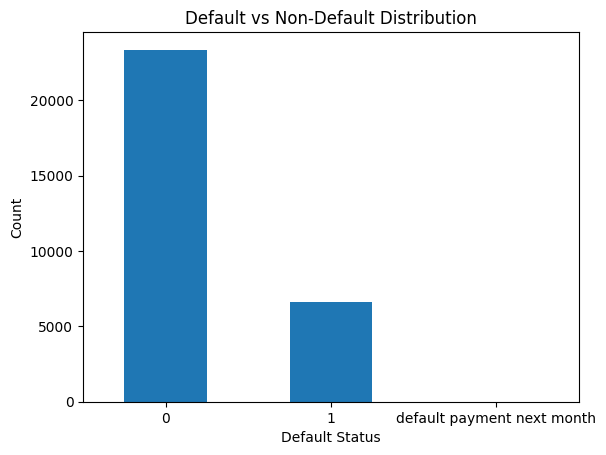

In [11]:
df[TARGET].value_counts().plot(kind="bar")
plt.title("Default vs Non-Default Distribution")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


## 6. Descriptive Statistical Analysis

Summary statistics (mean, standard deviation, minimum, maximum) are computed for numerical variables.

This provides insight into:
- Credit limits
- Bill amounts
- Payment amounts
- Age distribution

Understanding the range and variability of financial variables helps identify skewness and potential outliers.



In [12]:
df.describe().T


,count,unique,top,freq
Unnamed:_0,30001,30001,30000,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


## 7. Distribution of Key Financial Variables
Histograms are plotted for key features such as:

- Credit limit (LIMIT_BAL)
- Age (AGE)






Cannot plot histogram for 'LIMIT_BAL'. Column not found or is not numeric after processing.


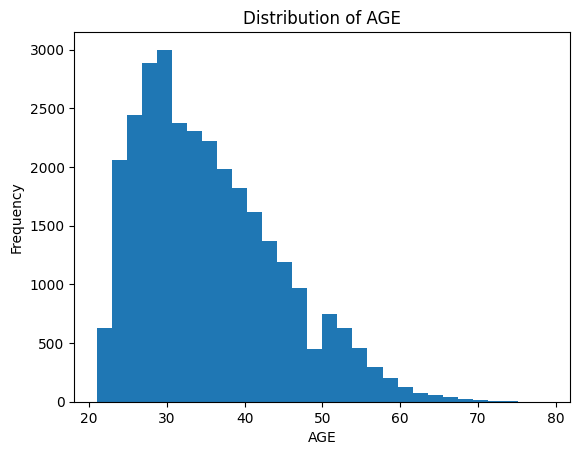

In [22]:

temp_df = df.copy()

new_columns = temp_df.iloc[0].values
temp_df = temp_df[1:].copy()
temp_df.columns = new_columns

temp_df.columns = [str(col).strip().replace(" ", "_") for col in temp_df.columns]


if 'default_payment_next_month' in temp_df.columns:
    temp_df.rename(columns={'default_payment_next_month': 'Y'}, inplace=True)

cols_to_convert = ["LIMIT_BAL", "AGE"]

for col in cols_to_convert:
    if col in temp_df.columns:
        temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found after header correction. Skipping type conversion.")

key_vars = ["LIMIT_BAL", "AGE"]

for col in key_vars:
    if col in temp_df.columns and pd.api.types.is_numeric_dtype(temp_df[col]):
        plt.hist(temp_df[col].dropna(), bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"Cannot plot histogram for '{col}'. Column not found or is not numeric after processing.")

## 8. Repayment Status Analysis

Repayment status variables (PAY_0, PAY_2, etc.) indicate payment delay behaviour.
Bar charts are used to visualise the frequency of repayment categories.  
Delayed payments are expected to be strongly associated with default risk.



In [16]:
pay_cols = [col for col in df.columns if "PAY_" in col]

for col in pay_cols[:3]:
    df[col].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Repayment Status - {col}")
    plt.show()


## 9. Relationship Between Financial Behaviour and Default

This section compares average financial metrics between defaulters and non-defaulters.

Key variables analysed include:
- Credit limit
- Bill amounts
- Payment amounts

Differences between the two groups help identify behavioural risk indicators.





In [24]:

df['X1'] = pd.to_numeric(df['X1'], errors='coerce')
df['X12'] = pd.to_numeric(df['X12'], errors='coerce')
df['X18'] = pd.to_numeric(df['X18'], errors='coerce')

grouped_data = df.groupby(TARGET)[['X1', 'X12', 'X18']].mean()

grouped_data.rename(columns={'X1': 'LIMIT_BAL', 'X12': 'BILL_AMT1', 'X18': 'PAY_AMT1'}, inplace=True)

print(grouped_data)

                                LIMIT_BAL     BILL_AMT1     PAY_AMT1
Y                                                                   
0                           178099.726074  51994.227273  6307.337357
1                           130109.656420  48509.162297  3397.044153
default payment next month            NaN           NaN          NaN


## 10. Correlation Analysis

A correlation matrix is computed to examine relationships between numerical variables.

Correlation analysis helps:
- Identify variables strongly associated with default
- Detect multicollinearity between financial variables
- Support feature selection decisions



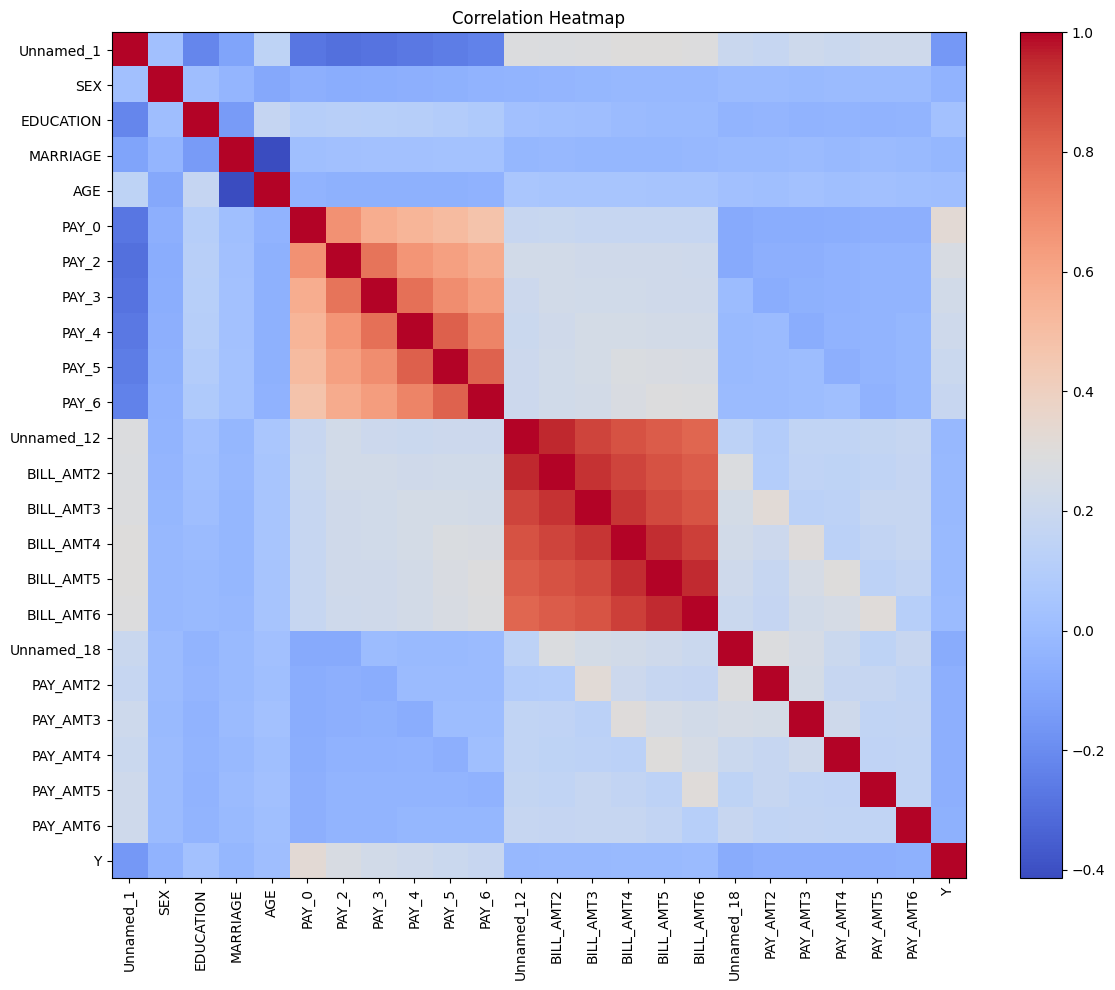

In [25]:

temp_df_for_corr = df.copy()
new_header = temp_df_for_corr.iloc[0]

temp_df_for_corr = temp_df_for_corr[1:]
temp_df_for_corr.columns = new_header

temp_df_for_corr.columns = [str(col).strip().replace(" ", "_") if pd.notna(col) else f"Unnamed_{i}" for i, col in enumerate(temp_df_for_corr.columns)]

if 'default_payment_next_month' in temp_df_for_corr.columns:
    temp_df_for_corr.rename(columns={'default_payment_next_month': 'Y'}, inplace=True)

for col in temp_df_for_corr.columns:
    temp_df_for_corr[col] = pd.to_numeric(temp_df_for_corr[col], errors='coerce')

if 'ID' in temp_df_for_corr.columns:
    temp_df_for_corr = temp_df_for_corr.drop(columns=['ID'])

numeric_cols = temp_df_for_corr.select_dtypes(include=np.number).columns
corr = temp_df_for_corr[numeric_cols].corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

### Variables Most Associated with Default

The correlation of each feature with the target variable is examined.

Repayment history variables are expected to show strong positive correlation with default risk.





In [21]:
corr[TARGET].sort_values(ascending=False)


,Y
Y,1.000000
PAY_0,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
EDUCATION,0.028006
AGE,0.013890
BILL_AMT6,-0.005372


## 12. Summary of EDA Findings

The exploratory data analysis reveals:

- The dataset is clean, with no significant missing or duplicate values.
- The target variable is imbalanced.
- Financial variables show high variance and right-skewed distributions.
- Repayment behaviour variables are strongly associated with default risk.
- The dataset is suitable for machine learning modelling in credit risk prediction.





